In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import matplotlib as mpl
import matplotlib.cm as cm
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import numpy as np
import matplotlib.cm as cm
import statsmodels.api as sm

sns.palplot(sns.cubehelix_palette(8, start=2.5, rot=.75))
sns.set_style('darkgrid')

%matplotlib inline 
font = {#'family' : 'normal',
        'weight' : 'bold',
        'size'   : 32}

mpl.rc('font', **font)
FSZ=18

In [2]:
m = Basemap(llcrnrlon=-87.875,llcrnrlat=41.64,urcrnrlon=-87.5,urcrnrlat=42.03,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='f',projection='merc',area_thresh = 0.1,\
            lat_0=40.,lon_0=-20.,lat_ts=20.)

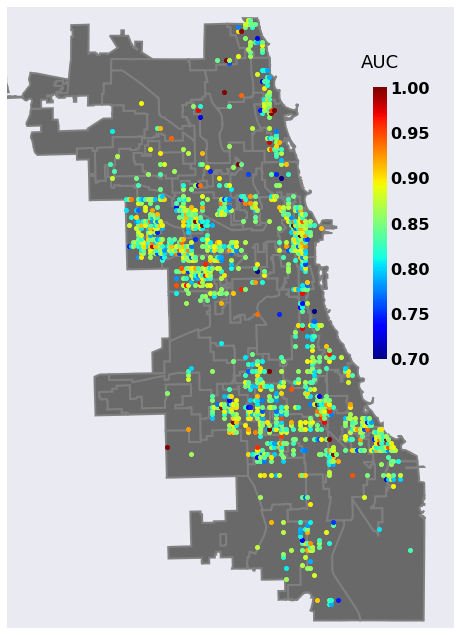

In [5]:
df=pd.read_csv('auc_spatialvar.dat')
df_=df[['lat1','lat2','lon1','lon2','auc']]
auc_data=df_.values
#auc_data1=np.array([[41.7597,41.762,-87.664,-87.662,.95],[41.8812,41.8835,-87.756,-87.754,.95]])

fig=plt.figure(figsize=(10,15))
ax      = fig.add_subplot(111)
m.drawcoastlines('.01',color='w')
#m.fillcontinents(color='w',lake_color='w')
cmap='jet'
VMIN=.7
m.readshapefile('chicago_boundaries/geo_export_a293ecd8-89b0-4b32-b28b-79a088e2b48c', 'wards', drawbounds = False)
patches   = []

for info, shape in zip(m.wards_info, m.wards):
    patches.append( Polygon(np.array(shape), True))
    ax.add_patch( Polygon(np.array(shape), closed=True,facecolor='.4',ec='.5',alpha=0.98,lw=2, zorder=2))

norm = mpl.colors.Normalize(vmin=VMIN,vmax=1.00)
col = cm.ScalarMappable(norm=norm, cmap=cmap)
    
for index in np.arange(len(auc_data)):
    lats=[(auc_data[index,0]+auc_data[index,1])/2]
    lons=[(auc_data[index,2]+auc_data[index,3])/2]
    x0,y0=m(lons,lats)
    plt.plot(x0,y0,'wo',ms=4,
             markerfacecolor=col.to_rgba(auc_data[index,4]),
             markeredgecolor=col.to_rgba(auc_data[index,4]))
    
cax, _ = mpl.colorbar.make_axes(ax, shrink=0.5)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                       norm=mpl.colors.Normalize(vmin=VMIN, vmax=1.0))
#cbar.set_clim(-2.0, 2.0)    

pos1=cax.get_position()
pos2 = [pos1.x0 - 0.15, pos1.y0+.15 ,pos1.width, pos1.height/1.5]
cax.set_position(pos2) # set a new position
plt.setp(plt.getp(cax, 'yticklabels'), color='k',fontsize=16)
plt.setp(plt.getp(cax, 'yticklabels'), fontweight='bold')
cax.set_title('AUC',fontsize=18,color='k',y=1.05)
      
#plt.savefig('auc__.pdf',dpi=600, bbox_inches='tight',transparent=True)